In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from utils.helper import fn_plot_tf_hist
import pandas as pd

In [123]:
def plot_graph(history):
    fig,ax = plt.subplots(1,2,figsize=(15,8))
    keys=list(history.history.keys())
    ax[0].plot(history.epoch,history.history[keys[0]],label=keys[0])
    ax[0].plot(history.epoch,history.history[keys[2]],label=keys[2])
    ax[0].set_title('Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(history.epoch,history.history[keys[1]],label=keys[1])
    ax[1].plot(history.epoch,history.history[keys[3]],label=keys[2])
    ax[1].set_title('Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

In [3]:
start = -2.1
end = 2.1

delta = 0.001

# Training Data
X_train = np.arange(start,end+delta,delta)
y_true = 2*np.square(X_train) + 2*np.sin(np.pi*X_train)
y_rng = np.random.rand(X_train.shape[0]) -0.5
y_train = y_true + y_rng*2

y_train.min(),y_true.max()

# Testing Data
X_test = np.arange(start,end+delta,delta*10)
y_true_test = 2*np.square(X_test) + 2*np.sin(np.pi*X_test)
y_rng = np.random.rand(X_test.shape[0]) -0.5
y_test = y_true_test + y_rng*2
y_test.min(),y_test.max()

(np.float64(-2.4796715408089343), np.float64(9.325824491056808))

In [4]:
X_train.shape[0]/16

262.5625

In [5]:
BATCH_SIZE = 16

num_example = 262* BATCH_SIZE
X_train = X_train[:num_example]
y_train = y_train[:num_example]
y_true = y_true[:num_example]

X_train.shape,y_train.shape,y_true.shape

((4192,), (4192,), (4192,))

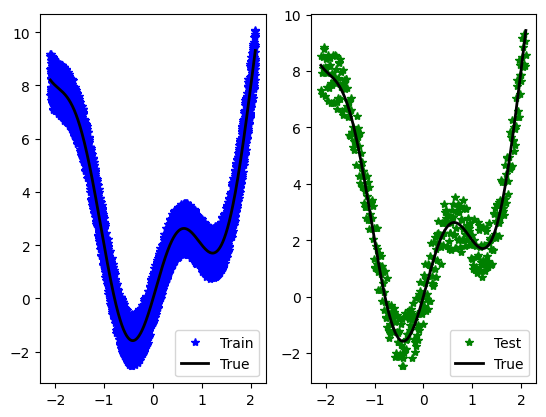

In [6]:
fig,ax = plt.subplots(1,2)

ax[0].plot(X_train,y_train,'b*',label='Train')
ax[0].plot(X_train,y_true,'k',label='True',linewidth=2)
ax[0].legend()

ax[1].plot(X_test,y_test,'g*',label='Test')
ax[1].plot(X_test,y_true_test,'k',label='True',linewidth=2)
ax[1].legend()

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))


train_ds = train_ds.shuffle(buffer_size= X_train.shape[0]).batch(BATCH_SIZE)
test_ds = test_ds.shuffle(buffer_size= X_test.shape[0]).batch(BATCH_SIZE)

train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
## Functional_api

num_features = 1

input_layer = tf.keras.Input(shape=(1,)) 

hidden_layer = tf.keras.layers.Dense(512,activation='relu')(input_layer)
hidden_layer = tf.keras.layers.Dense(256,activation='relu')(hidden_layer)
output_layer = tf.keras.layers.Dense(1,)(hidden_layer)

model = tf.keras.Model(inputs = input_layer,outputs= output_layer)

In [9]:
RANDOM_STATE = 42
ALPHA = 0.001

initializer =tf.keras.initializers.GlorotUniform(seed=RANDOM_STATE)
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)
regularizer = tf.keras.regularizers.L2(0.05)

metrics = tf.keras.metrics.MeanAbsoluteError()

In [10]:
model.compile(optimizer=optimizer,loss=loss_fn,metrics=[metrics])
history = model.fit(train_ds,validation_data=test_ds,epochs=250)

Epoch 1/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.6009 - mean_absolute_error: 1.2112 - val_loss: 1.2548 - val_mean_absolute_error: 0.8807
Epoch 2/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0771 - mean_absolute_error: 0.8108 - val_loss: 0.9145 - val_mean_absolute_error: 0.7665
Epoch 3/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7366 - mean_absolute_error: 0.6892 - val_loss: 0.6590 - val_mean_absolute_error: 0.6620
Epoch 4/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5113 - mean_absolute_error: 0.5876 - val_loss: 0.4889 - val_mean_absolute_error: 0.5813
Epoch 5/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4221 - mean_absolute_error: 0.5411 - val_loss: 0.4168 - val_mean_absolute_error: 0.5435
Epoch 6/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3981 - mean_absolute_error: 0.5296 - val_loss: 0.3986 - val_mean_absolute_error: 0.5362
Epoch 7/250
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3873 - mean_absolute_error: 0.5

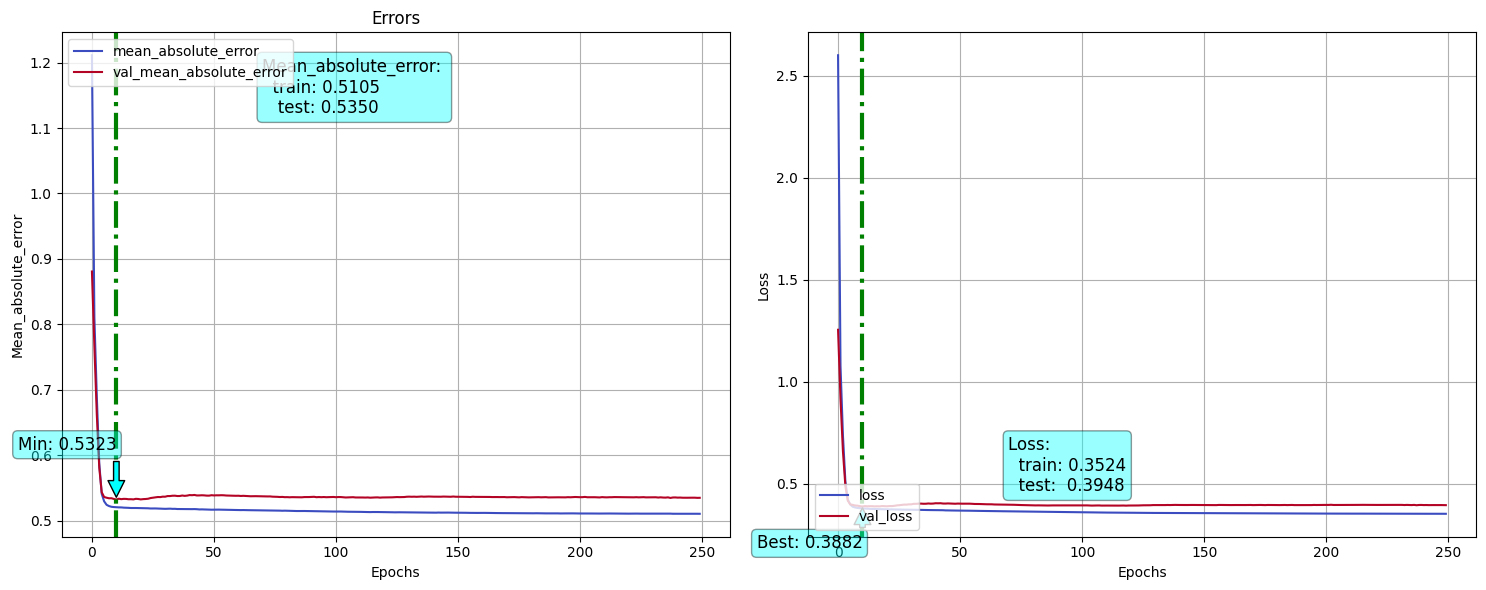

In [13]:
hist_df = pd.DataFrame(data={'loss':history.history['loss'],
                                 'mean_absolute_error':history.history['mean_absolute_error'],
                                 'val_loss':history.history['val_loss'],
                                 'val_mean_absolute_error':history.history['val_mean_absolute_error']})
fn_plot_tf_hist(hist_df=hist_df)
# hist_df
# plot_graph(history)

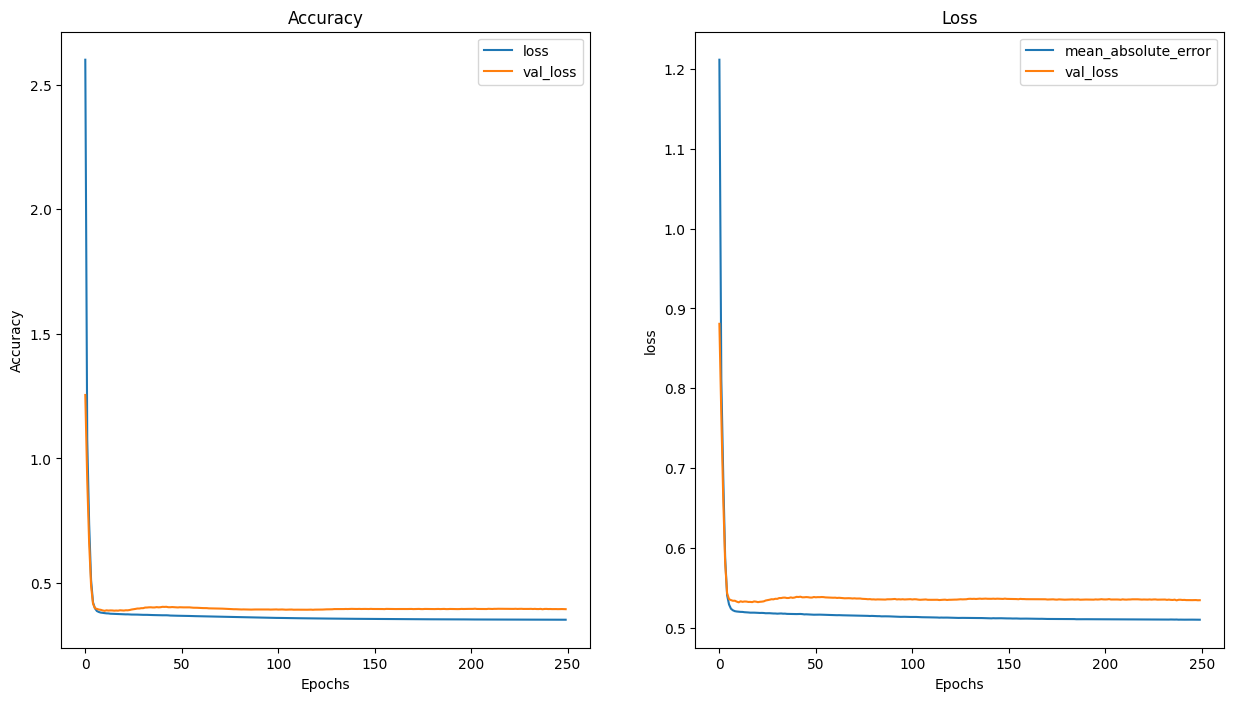

In [12]:
from utils_helper.helper import plot_graph
plot_graph(history)